In [ ]:
!git clone https://github.com/ahmedramadan96/EALPR.git

Cloning into 'EALPR'...
remote: Enumerating objects: 18740, done.
remote: Counting objects: 100% (12906/12906), done.
remote: Compressing objects: 100% (12903/12903), done.
remote: Total 18740 (delta 12), reused 12892 (delta 3), pack-reused 5834
Receiving objects: 100% (18740/18740), 273.19 MiB | 35.88 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (18735/18735), done.


In [ ]:
import os
import pandas as pd

In [ ]:
path = 'EALPR/EALPR Vechicles dataset/Vehicles Labeling'
labels_dict = dict(filepath=[],center_x=[],center_y=[],bb_w=[],bb_h=[])
for filename in os.listdir(path):
    filePath=path+"/"+filename
    with open(filePath) as cur:
        info = cur.readline()
        info=info.split()
        if len(info)<5:
            continue
        labels_dict['filepath'].append(filePath)
        labels_dict['center_x'].append(float(info[1]))    # center x of the bounding box
        labels_dict['center_y'].append(float(info[2]))   # center y of the bounding box
        labels_dict['bb_w'].append(float(info[3]))    # weight of bounding box
        labels_dict['bb_h'].append(float(info[4]))   # height of bounding box
        cur.close()

In [ ]:
df = pd.DataFrame(labels_dict)
df.to_csv('vehicles_labels.csv',index=False)
df.head()

,filepath,center_x,center_y,bb_w,bb_h
0,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.533618,0.839026,0.108858,0.048676
1,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.522656,0.342708,0.142187,0.106250
2,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.471296,0.481771,0.557407,0.163542
3,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.500463,0.476936,0.130556,0.120264
4,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.485556,0.627556,0.164444,0.069333


In [ ]:
df['filepath'][0]

'EALPR/EALPR Vechicles dataset/Vehicles Labeling/0465.txt'

In [ ]:
def find_files(filename, search_path):
    result = []
# Wlaking top-down from the root
    for root, dir, files in os.walk(search_path):
         if filename in files:
                result.append(os.path.join(root, filename))
    return result

In [ ]:
filename = df['filepath'][0]
def getFilename(filename):
    filename_image =filename.split('/')[3].split('.')[0]+'.jpg'
    if len(find_files(filename_image,'EALPR/EALPR Vechicles dataset/Vehicles'))==0:
        filename_image =filename.split('/')[3].split('.')[0]+'.JPG'
    if len(find_files(filename_image,'EALPR/EALPR Vechicles dataset/Vehicles'))==0:
        filename_image =filename.split('/')[3].split('.')[0]+'.jpeg'
    filepath_image = os.path.join('EALPR/EALPR Vechicles dataset/Vehicles',filename_image)
    return filepath_image
print(getFilename(filename))

EALPR/EALPR Vechicles dataset/Vehicles/0465.jpg


In [ ]:
df['filename']= list(df['filepath'].apply(getFilename))

In [ ]:
df.head()

,filepath,center_x,center_y,bb_w,bb_h,filename
0,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.533618,0.839026,0.108858,0.048676,EALPR/EALPR Vechicles dataset/Vehicles/0465.jpg
1,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.522656,0.342708,0.142187,0.106250,EALPR/EALPR Vechicles dataset/Vehicles/1290.jpg
2,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.471296,0.481771,0.557407,0.163542,EALPR/EALPR Vechicles dataset/Vehicles/0173.jpg
3,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.500463,0.476936,0.130556,0.120264,EALPR/EALPR Vechicles dataset/Vehicles/1288.jpg
4,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.485556,0.627556,0.164444,0.069333,EALPR/EALPR Vechicles dataset/Vehicles/1427.jpg


In [ ]:
df.drop(columns=['filepath'],inplace=True)
df.head()

,center_x,center_y,bb_w,bb_h,filename
0,0.533618,0.839026,0.108858,0.048676,EALPR/EALPR Vechicles dataset/Vehicles/0465.jpg
1,0.522656,0.342708,0.142187,0.106250,EALPR/EALPR Vechicles dataset/Vehicles/1290.jpg
2,0.471296,0.481771,0.557407,0.163542,EALPR/EALPR Vechicles dataset/Vehicles/0173.jpg
3,0.500463,0.476936,0.130556,0.120264,EALPR/EALPR Vechicles dataset/Vehicles/1288.jpg
4,0.485556,0.627556,0.164444,0.069333,EALPR/EALPR Vechicles dataset/Vehicles/1427.jpg


In [ ]:
df=df[['filename','center_x','center_y','bb_w','bb_h']]
df.head()

,filename,center_x,center_y,bb_w,bb_h
0,EALPR/EALPR Vechicles dataset/Vehicles/0465.jpg,0.533618,0.839026,0.108858,0.048676
1,EALPR/EALPR Vechicles dataset/Vehicles/1290.jpg,0.522656,0.342708,0.142187,0.106250
2,EALPR/EALPR Vechicles dataset/Vehicles/0173.jpg,0.471296,0.481771,0.557407,0.163542
3,EALPR/EALPR Vechicles dataset/Vehicles/1288.jpg,0.500463,0.476936,0.130556,0.120264
4,EALPR/EALPR Vechicles dataset/Vehicles/1427.jpg,0.485556,0.627556,0.164444,0.069333


In [ ]:
df.shape

(2087, 5)

In [ ]:
df_train = df.iloc[:1462] #train
df_test = df.iloc[1462:] #test 30%

## I need to put the train images with their labels text files in a folder which i will call **train** and i should do the same for the **test** images

## and then put these folders in a folder let's called it **data** and include with them file data.yaml file include the number of classes(1) and also   

## the classes file which we already have!

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15002, done.
remote: Total 15002 (delta 0), reused 0 (delta 0), pack-reused 15002
Receiving objects: 100% (15002/15002), 14.08 MiB | 21.39 MiB/s, done.
Resolving deltas: 100% (10285/10285), done.


In [ ]:
!pip install -r ./yolov5/requirements.txt



In [ ]:
path='./yolov5/data_images'
os.mkdir(path)
os.mkdir(path +'/train')
os.mkdir(path+'/test')

In [ ]:
 df_train['filename'][0]

'EALPR/EALPR Vechicles dataset/Vehicles/0465.jpg'

In [ ]:
import shutil
original_images=r'./EALPR/EALPR Vechicles dataset/Vehicles/'
original_labels=r'./EALPR/EALPR Vechicles dataset/Vehicles Labeling/'
target = r'./yolov5/data_images/train/'
for x in df_train['filename']:
    name=x.split('/')[3]
    shutil.copyfile(str(original_images+name),str(target+name))
    shutil.copyfile(str(original_labels+name.split('.')[0]+'.txt'),str(target+name.split('.')[0]+'.txt'))

In [ ]:
import shutil
original_images=r'./EALPR/EALPR Vechicles dataset/Vehicles/'
original_labels=r'./EALPR/EALPR Vechicles dataset/Vehicles Labeling/'
target = r'./yolov5/data_images/test/'
for x in df_test['filename']:
    name=x.split('/')[3]
    shutil.copyfile(str(original_images+name),str(target+name))
    shutil.copyfile(str(original_labels+name.split('.')[0]+'.txt'),str(target+name.split('.')[0]+'.txt'))

In [ ]:
os.listdir('yolov5/')

['setup.cfg',
 'segment',
 '.gitattributes',
 '.dockerignore',
 'detect.py',
 'hubconf.py',
 '.gitignore',
 'data',
 'benchmarks.py',
 'train.py',
 'CONTRIBUTING.md',
 'README.zh-CN.md',
 'models',
 'requirements.txt',
 'export.py',
 'classify',
 'CITATION.cff',
 'LICENSE',
 '.pre-commit-config.yaml',
 'utils',
 'README.md',
 'tutorial.ipynb',
 '.github',
 'val.py',
 '.git',
 'data_images']

In [ ]:
os.listdir('yolov5/data_images/')

['train', 'test']

In [ ]:
shutil.copyfile(str("/kaggle/input/data-yml/data.yaml"),str("./yolov5/data.yaml"))

'./yolov5/data.yaml'

In [ ]:
!pip install GPUtil

import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()

  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=3309555a23ff9b949e7eadbae20f786207c569854639464767c9b71a79247810
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil
Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  3% |  2% |


In [ ]:
!python ./yolov5/train.py --data ./yolov5/data.yaml --cfg ./yolov5/models/yolov5s.yaml --batch-size 8 --name Model --epochs 10

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5/yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=./yolov5/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=Model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)



In [ ]:
os.listdir('./yolov5/runs/train/Model/weights/')

['last.pt', 'best.pt']

In [ ]:
!python ./yolov5/export.py --weight ./yolov5/runs/train/Model/weights/best.pt --include torchscript onnx

export: data=yolov5/data/coco128.yaml, weights=['./yolov5/runs/train/Model/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from yolov5/runs/train/Model/weights/best.pt with output shape (1, 25200, 6) (13.7 MB)

TorchScript: starting export with torch 1.11.0...
TorchScript: export success ✅ 2.4s, saved as yolov5/runs/train/Model/weights/best.torchscript (27.2 MB)

ONNX: starting export with onnx 1.13.0...
ONNX: export failure ❌ 0.1s: Unsupported ONNX opset version: 17

Export complete (3.3s)
Results saved to /kaggle/working/yolov5/runs/train/Mo

In [ ]:
os.listdir("yolov5/runs/train/Model/")

['results.csv',
 'results.png',
 'weights',
 'labels.jpg',
 'F1_curve.png',
 'val_batch2_pred.jpg',
 'confusion_matrix.png',
 'labels_correlogram.jpg',
 'train_batch1.jpg',
 'hyp.yaml',
 'train_batch2.jpg',
 'val_batch0_pred.jpg',
 'PR_curve.png',
 'events.out.tfevents.1675267547.5c906a6dd330.141.0',
 'opt.yaml',
 'train_batch0.jpg',
 'R_curve.png',
 'val_batch1_labels.jpg',
 'val_batch2_labels.jpg',
 'val_batch1_pred.jpg',
 'val_batch0_labels.jpg',
 'P_curve.png']

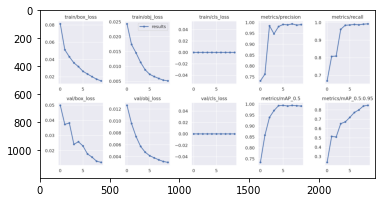

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = "yolov5/runs/train/Model/results.png"
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()